<a href="https://colab.research.google.com/github/lloppy/patterns_5sem_urfu/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотеки

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#from google.colab import drive
#drive.mount('/content/drive')

#Открытие файла

In [ ]:
data = pd.read_csv('gen_info.csv')
data

C:\Users\fuelc\AppData\Local\Temp\ipykernel_44384\1836761588.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,Unnamed: 0,TCGA-HC-A6AP-01A-11R-A30B-07,TCGA-KK-A7B2-01A-12R-A32O-07,TCGA-EJ-A8FO-01A-21R-A36G-07,TCGA-G9-6377-01A-11R-1965-07,TCGA-G9-6494-01A-11R-1789-07,TCGA-G9-A9S0-01A-11R-A41O-07,TCGA-KK-A6E5-01A-11R-A311-07,TCGA-J4-A67N-01A-11R-A30B-07,TCGA-VP-A87B-01A-11R-A352-07,...,TCGA-EJ-A46E-01A-31R-A250-07,TCGA-HC-8265-01A-11R-2263-07,TCGA-V1-A8WS-01A-11R-A37L-07,TCGA-G9-6351-01A-21R-1965-07,TCGA-CH-5768-01A-11R-1580-07,TCGA-J4-AATV-01A-11R-A41O-07,TCGA-HC-8266-01A-11R-2263-07,TCGA-HC-8262-01A-11R-2263-07,TCGA-EJ-7797-01A-11R-2263-07,TCGA-G9-6370-01A-11R-1789-07
0,ENSG00000000003.15,4158,2637,4429,4314,2907,1184,3020,1995,2097,...,2243,2878,4225,6968,6616,3115,4699,4835,4222,6753
1,ENSG00000000005.6,138,2,2,5,3,0,6,1,1,...,4,1,23,33,2,60,14,0,5,26
2,ENSG00000000419.13,1571,1436,1765,1454,1548,752,1450,1114,786,...,1292,958,2110,1463,1624,1393,1575,2073,1214,1400
3,ENSG00000000457.14,379,452,1069,845,794,428,475,489,303,...,630,531,1585,983,1841,735,1003,1763,1425,990
4,ENSG00000000460.17,140,123,183,149,150,95,90,95,88,...,131,144,235,149,277,187,245,209,228,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60656,ENSG00000288670.1,154,158,337,292,347,255,258,140,236,...,312,167,394,450,349,270,282,437,317,434
60657,ENSG00000288671.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60658,ENSG00000288674.1,3,1,3,0,5,3,4,7,7,...,9,2,4,7,7,14,8,4,3,2
60659,ENSG00000288675.1,77,35,17,24,20,12,37,65,38,...,7,31,29,31,20,16,24,31,31,27


In [ ]:
df = data.T
df

,0,1,2,3,4,5,6,7,8,9,...,60651,60652,60653,60654,60655,60656,60657,60658,60659,60660
Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,reccurence
TCGA-HC-A6AP-01A-11R-A30B-07,4158,138,1571,379,140,420,1521,3964,1820,651,...,0,9,0,1,0,154,0,3,77,no
TCGA-KK-A7B2-01A-12R-A32O-07,2637,2,1436,452,123,584,850,1758,1975,857,...,0,11,0,0,0,158,0,1,35,no
TCGA-EJ-A8FO-01A-21R-A36G-07,4429,2,1765,1069,183,250,742,2857,2786,2184,...,0,5,0,0,0,337,0,3,17,no
TCGA-G9-6377-01A-11R-1965-07,4314,5,1454,845,149,279,722,3888,1788,2468,...,0,7,0,0,0,292,0,0,24,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-J4-AATV-01A-11R-A41O-07,3115,60,1393,735,187,485,1046,2357,2189,1501,...,0,27,0,0,0,270,0,14,16,no
TCGA-HC-8266-01A-11R-2263-07,4699,14,1575,1003,245,605,2028,2280,3555,2019,...,0,24,0,0,0,282,0,8,24,no
TCGA-HC-8262-01A-11R-2263-07,4835,0,2073,1763,209,193,1130,3680,2647,2505,...,0,40,0,1,0,437,0,4,31,no
TCGA-EJ-7797-01A-11R-2263-07,4222,5,1214,1425,228,246,1728,2890,2732,1677,...,0,20,0,0,0,317,0,3,31,no


Заменяем да и нет на 1 и 0

In [ ]:
df[60660] = df[60660].replace({'yes': 1, 'no': 0})
df

,0,1,2,3,4,5,6,7,8,9,...,60651,60652,60653,60654,60655,60656,60657,60658,60659,60660
Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,reccurence
TCGA-HC-A6AP-01A-11R-A30B-07,4158,138,1571,379,140,420,1521,3964,1820,651,...,0,9,0,1,0,154,0,3,77,0
TCGA-KK-A7B2-01A-12R-A32O-07,2637,2,1436,452,123,584,850,1758,1975,857,...,0,11,0,0,0,158,0,1,35,0
TCGA-EJ-A8FO-01A-21R-A36G-07,4429,2,1765,1069,183,250,742,2857,2786,2184,...,0,5,0,0,0,337,0,3,17,0
TCGA-G9-6377-01A-11R-1965-07,4314,5,1454,845,149,279,722,3888,1788,2468,...,0,7,0,0,0,292,0,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-J4-AATV-01A-11R-A41O-07,3115,60,1393,735,187,485,1046,2357,2189,1501,...,0,27,0,0,0,270,0,14,16,0
TCGA-HC-8266-01A-11R-2263-07,4699,14,1575,1003,245,605,2028,2280,3555,2019,...,0,24,0,0,0,282,0,8,24,0
TCGA-HC-8262-01A-11R-2263-07,4835,0,2073,1763,209,193,1130,3680,2647,2505,...,0,40,0,1,0,437,0,4,31,0
TCGA-EJ-7797-01A-11R-2263-07,4222,5,1214,1425,228,246,1728,2890,2732,1677,...,0,20,0,0,0,317,0,3,31,0


Проверяем нет ли Нан значений

In [ ]:
df.isna().sum().sum()

np.int64(0)

Отделяем тагретную переменную

In [ ]:
y = df[1:][60660]
x = df[1:].drop(columns = 60660)
x

,0,1,2,3,4,5,6,7,8,9,...,60650,60651,60652,60653,60654,60655,60656,60657,60658,60659
TCGA-HC-A6AP-01A-11R-A30B-07,4158,138,1571,379,140,420,1521,3964,1820,651,...,0,0,9,0,1,0,154,0,3,77
TCGA-KK-A7B2-01A-12R-A32O-07,2637,2,1436,452,123,584,850,1758,1975,857,...,0,0,11,0,0,0,158,0,1,35
TCGA-EJ-A8FO-01A-21R-A36G-07,4429,2,1765,1069,183,250,742,2857,2786,2184,...,0,0,5,0,0,0,337,0,3,17
TCGA-G9-6377-01A-11R-1965-07,4314,5,1454,845,149,279,722,3888,1788,2468,...,0,0,7,0,0,0,292,0,0,24
TCGA-G9-6494-01A-11R-1789-07,2907,3,1548,794,150,124,1057,2632,1976,2062,...,0,0,3,0,0,0,347,0,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-J4-AATV-01A-11R-A41O-07,3115,60,1393,735,187,485,1046,2357,2189,1501,...,0,0,27,0,0,0,270,0,14,16
TCGA-HC-8266-01A-11R-2263-07,4699,14,1575,1003,245,605,2028,2280,3555,2019,...,0,0,24,0,0,0,282,0,8,24
TCGA-HC-8262-01A-11R-2263-07,4835,0,2073,1763,209,193,1130,3680,2647,2505,...,0,0,40,0,1,0,437,0,4,31
TCGA-EJ-7797-01A-11R-2263-07,4222,5,1214,1425,228,246,1728,2890,2732,1677,...,0,0,20,0,0,0,317,0,3,31


In [ ]:
y

TCGA-HC-A6AP-01A-11R-A30B-07    0
TCGA-KK-A7B2-01A-12R-A32O-07    0
TCGA-EJ-A8FO-01A-21R-A36G-07    0
TCGA-G9-6377-01A-11R-1965-07    0
TCGA-G9-6494-01A-11R-1789-07    0
                               ..
TCGA-J4-AATV-01A-11R-A41O-07    0
TCGA-HC-8266-01A-11R-2263-07    0
TCGA-HC-8262-01A-11R-2263-07    0
TCGA-EJ-7797-01A-11R-2263-07    0
TCGA-G9-6370-01A-11R-1789-07    0
Name: 60660, Length: 554, dtype: object

Нормализация фичей

In [ ]:
x_norm = StandardScaler().fit_transform(x)
x_norm

array([[ 0.36811914,  1.24367211,  0.28714868, ...,  0.        ,
        -0.62069046,  1.9530743 ],
       [-0.59107126, -0.21849894, -0.01029664, ...,  0.        ,
        -0.95116862,  0.01540608],
       [ 0.53902026, -0.21849894,  0.71458863, ...,  0.        ,
        -0.62069046, -0.81502316],
       ...,
       [ 0.79505662, -0.24000145,  1.39320464, ...,  0.        ,
        -0.45545139, -0.16913375],
       [ 0.40847956, -0.18624516, -0.49942896, ...,  0.        ,
        -0.62069046, -0.16913375],
       [ 2.00460771,  0.03953125, -0.0896154 , ...,  0.        ,
        -0.78592954, -0.35367358]])

#PCA
PCA или же метод главных компонент используется для сокращения количества признаков в наборе данных, сохраняя при этом как можно больше информации.

Подбираем число ГК

In [ ]:
comps = 554
pca = PCA(n_components = comps)
pca.fit(x)

PCA(n_components=554)

наш новый набор фичей

In [ ]:
pca_data = pca.transform(x)
pca_data

array([[-1.93365061e+05, -6.77929872e+05, -8.03497015e+04, ...,
        -5.87314801e+02,  1.37557898e+02,  1.47837653e-08],
       [-1.39257614e+05, -2.84864959e+05, -2.30744063e+05, ...,
         5.95828696e+02,  5.65227667e+01, -4.69242423e-11],
       [-2.27037602e+05, -3.35167155e+05,  4.88571630e+05, ...,
         1.68425186e+02,  3.09751523e+02,  8.02486966e-11],
       ...,
       [-1.51574963e+05,  6.45150344e+05,  7.19990640e+05, ...,
        -6.27943077e+01, -1.65853410e+02,  2.75747425e-10],
       [-1.71114592e+05, -2.12990470e+05,  2.04434329e+05, ...,
         4.30218823e+02,  1.45754249e+02, -1.65556457e-10],
       [-1.02823100e+05,  1.35294638e+05, -8.75105427e+04, ...,
        -9.34949337e+01,  1.10982747e+01, -1.13729470e-10]])

Наш набор тагретов

In [ ]:
Y = pd.DataFrame(y)
Y.reset_index(drop=True, inplace=True)
Y

,60660
0,0
1,0
2,0
3,0
4,0
...,...
549,0
550,0
551,0
552,0


PCA-датасет

In [ ]:
pca_df = pd.DataFrame(data = pca_data, columns = ['PCA-{}'.format(i) for i in range(1, comps + 1)])
pca_df['PCA-Y'] = Y
pca_df = pca_df.dropna()
pca_df

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,...,PCA-546,PCA-547,PCA-548,PCA-549,PCA-550,PCA-551,PCA-552,PCA-553,PCA-554,PCA-Y
0,-193365.061348,-677929.872342,-80349.701495,-552857.128939,-172548.092921,-336886.617010,-153826.895003,306733.794209,142938.809441,-97989.073820,...,-406.219487,-622.185241,13.799837,406.433411,455.063990,-382.809071,-587.314801,137.557898,1.478377e-08,0
1,-139257.614222,-284864.959162,-230744.063330,-157599.893700,-120409.026008,-39743.062676,-140252.161016,252184.581396,19260.809012,4490.275479,...,1580.667424,-4165.216687,1716.311100,1.781450,1049.160047,2038.653063,595.828696,56.522767,-4.692424e-11,0
2,-227037.602363,-335167.154845,488571.630495,-350990.333672,306501.971704,269165.777946,-11706.647997,61441.608007,67568.229934,-24845.967973,...,1594.011369,-286.427498,126.762288,0.572773,331.829134,371.336160,168.425186,309.751523,8.024870e-11,0
3,-230872.309550,-19334.518618,780939.144460,55451.013205,-321258.518582,-269632.602229,68514.422065,-71143.538136,50637.352514,6733.044700,...,899.421697,-90.992867,36.164542,-197.197706,-310.634013,-344.281423,-44.542358,290.412200,-5.127276e-11,0
4,-245131.524268,29569.865623,846262.565930,-185694.202151,-158519.438863,66588.432806,-298805.353960,-228807.666227,-22162.696203,22734.541133,...,528.051392,-185.806561,-276.399449,173.815893,-1.128426,20.613706,88.188299,208.411188,7.434508e-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,-65684.474783,-13691.162955,-394126.878602,246826.313810,386111.814164,-54070.607042,-35831.784736,-3013.294041,222702.510629,-77293.178718,...,-577.139390,-524.014302,-1053.277784,-2157.470601,308.603426,-848.286326,-105.887408,-365.251005,-1.405454e-11,0
550,-89759.473334,-86870.130435,-409050.827071,-52567.870978,125098.128303,104261.967725,-1209.506742,-8198.766139,142302.592591,-59598.658174,...,-541.021508,707.897826,-2303.613128,319.146736,-1455.529971,-368.909944,-513.842035,-93.893106,-4.648371e-11,0
551,-151574.963374,645150.344372,719990.639985,706962.927359,-189533.417549,-62062.311606,193382.109841,-14371.217615,103752.277003,-56668.291920,...,-1558.229969,-205.042247,913.697845,795.481882,-76.049806,750.031513,-62.794308,-165.853410,2.757474e-10,0
552,-171114.591764,-212990.470033,204434.328877,-31981.365890,99159.908878,-35642.611944,220361.832068,-55654.267209,19304.403771,-46260.963246,...,295.969732,59.068449,161.725450,1265.800473,-254.703998,-447.690459,430.218823,145.754249,-1.655565e-10,0


Проверка на Nan

In [ ]:
pca_df.isna().sum().sum()

np.int64(0)

Получение собственных значений

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.27145590e-01, 1.93886387e-01, 1.11225059e-01, 1.03166712e-01,
       3.41542632e-02, 2.04187333e-02, 1.55861529e-02, 1.17781626e-02,
       7.31663073e-03, 6.66733056e-03, 5.62329721e-03, 5.24115571e-03,
       3.69646476e-03, 3.36688546e-03, 3.09825767e-03, 2.77104627e-03,
       2.36924972e-03, 2.07166347e-03, 2.00709721e-03, 1.81650340e-03,
       1.76269388e-03, 1.59132691e-03, 1.47001813e-03, 1.25906026e-03,
       1.20345695e-03, 1.13306285e-03, 1.07846731e-03, 1.01764433e-03,
       9.32706704e-04, 8.87458103e-04, 8.28897004e-04, 8.12366958e-04,
       7.81324797e-04, 7.44588042e-04, 7.04852192e-04, 6.80972922e-04,
       6.32563084e-04, 5.68975563e-04, 5.38690144e-04, 5.16687438e-04,
       4.93881995e-04, 4.73531854e-04, 4.22209843e-04, 4.06364437e-04,
       3.79724063e-04, 3.69461364e-04, 3.62028806e-04, 3.34392770e-04,
       3.31299954e-04, 3.20368885e-04, 3.12591126e-04, 2.86714843e-04,
       2.83173640e-04, 2.69898149e-04, 2.55001320e-04, 2.43110417e-04,
      

Матрица корреляции PCA-признаков с тагретной переменной

In [ ]:
corMatPCA = pca_df.corr()
targetCorPCA = corMatPCA['PCA-Y'].to_frame(name='ReccurenceCorrelation')
targetCorPCA = targetCorPCA.sort_values(by = 'ReccurenceCorrelation', ascending = False, key = abs)
targetCorPCA.style.background_gradient(vmin=-1, vmax=1)

,ReccurenceCorrelation
PCA-Y,1.000000
PCA-406,0.122892
PCA-262,0.117018
PCA-58,0.115180
PCA-547,-0.112896
PCA-90,0.107504
PCA-145,0.107008
PCA-338,0.103660
PCA-377,-0.102590
PCA-479,0.096167


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

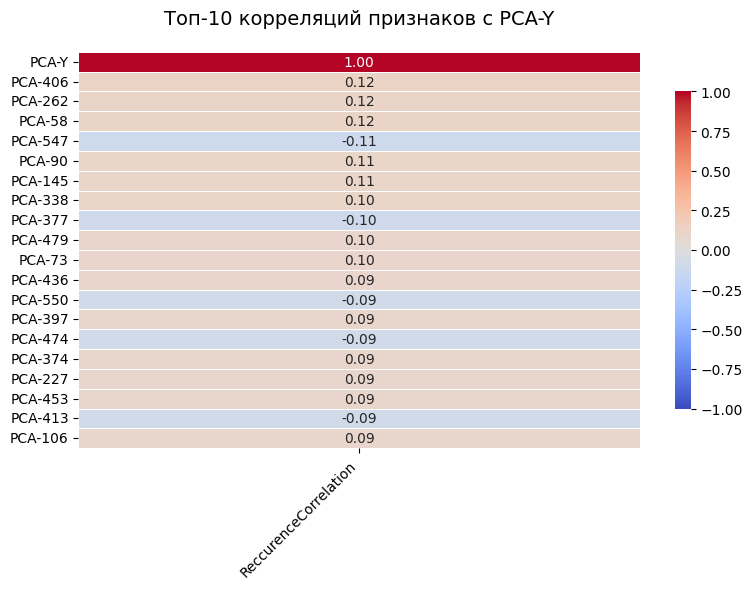

In [ ]:
# Ограничение на топ-10 признаков с максимальной корреляцией
top_features = targetCorPCA.head(20)  # Берем только топ-10 признаков

# Построение тепловой карты
plt.figure(figsize=(8, 6))  # Увеличиваем размеры графика
sns.heatmap(top_features,
            annot=True,  # Показывать значения корреляции
            fmt=".2f",  # Формат значений
            cmap="coolwarm",  # Цветовая палитра
            vmin=-1, vmax=1,  # Диапазон значений
            linewidths=0.5,  # Разделительные линии
            square=False,  # Не принуждаем ячейки быть квадратными
            cbar_kws={'shrink': 0.8})  # Уменьшение цветовой шкалы

# Настройка графика
plt.title('Топ-10 корреляций признаков с PCA-Y', fontsize=14, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Поворот подписей оси X
plt.yticks(fontsize=10)  # Размер шрифта оси Y
plt.tight_layout()

# Показ графика
plt.show()



понимаем что большее число главных компонент не нужно, так как последние компоненты уже оказывают очень низкое влияние. Но нужно проверить насколько меньше количество гк можно взять

In [ ]:
def plot_line(x,y,title_x = '', title_y = '', ):
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        opacity=0.7,
        marker=dict(size = 5,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=1
            )),

        )
    )
    fig.update_layout(
            width=1000,
            height=600,
            xaxis_title=title_x,
            yaxis_title=title_y,
            yaxis_type = "log",
        template = "plotly_dark"
            )


    fig.show()


In [ ]:
plot_line(np.array(range(len(explained_variance)))+1,
          np.cumsum(explained_variance))

In [ ]:
plot_line(np.array(range(len(explained_variance)))+1,
          explained_variance)

После анализа графиков методом локтя мы подтвердили предположение, что гк достаточно, можно оставить примерно 70-90. Но для точности найдем такое число гк, чтобы они объясняли 99% дисперсии:

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance)

# Поиск минимального числа ГК, которое объясняет 99% дисперсии
n_components = np.argmax(cumulative_explained_variance >= 0.99) + 1

print(f"Необходимое количество ГК: {n_components}")

Необходимое количество ГК: 66


для 99% достаточно 66, но пока попробуем оставить 553, с целью сохранить больше информации. К тому же у нас и так мало значений осталось в сравнении с изначальным датасетом

#Разделение на тренировочные и тестовые выборки


Делим новый датасет на тренировочные и тестовые выборки

In [ ]:
PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test = train_test_split(pca_df.drop(columns = 'PCA-Y'), pca_df['PCA-Y'], train_size=0.8, random_state = 42)
print(PCA_x_train, PCA_x_test, PCA_y_train, PCA_y_test)

             PCA-1          PCA-2         PCA-3          PCA-4         PCA-5  \
245 -229945.073807 -428298.970973  2.803913e+05 -617519.902635  1.593407e+05   
513 -239079.418306 -406607.582376  5.584072e+05 -578872.190633  1.118576e+06   
18   -20617.646129 -166697.052591 -1.031803e+06   42465.397839 -1.476721e+04   
325 -110194.664618 -345073.659062 -5.497539e+05 -198031.342961 -1.590461e+05   
487 -156522.053601 -556670.782343 -2.543211e+05 -289570.438246 -1.870152e+05   
..             ...            ...           ...            ...           ...   
71  -167484.635380 -464821.912779 -2.398877e+05 -442874.058451 -3.096745e+05   
106  -80715.463156 -488882.012432 -8.068544e+05 -131313.363745 -9.627685e+04   
270 -381461.235967 -304570.878011  1.479513e+06 -904234.736242 -4.562168e+05   
435 -282414.901382  -19125.757438  1.068599e+06 -271195.478920  5.258323e+05   
102 -149143.248335 -320664.230811 -1.383522e+05 -309575.266774  2.180859e+04   

             PCA-6          PCA-7      

In [ ]:
PCA_y_train.nunique()

2

переводим тагреты в категориальные признаки для модели

In [ ]:
PCA_y_train = PCA_y_train.astype('category').cat.codes
PCA_y_test = PCA_y_test.astype('category').cat.codes

#Модель1
**Логистическая регрессия** — это статистическая модель, используемая для решения задач бинарной классификации. Логистическая регрессия основана на понятии логистической функции (сигмоидальной функции), которая преобразует входные признаки в вероятность принадлежности объекта к одному из классов.

In [ ]:
PCA_model_lr = LogisticRegression().fit(PCA_x_train, PCA_y_train)
PCA_predict_lr = PCA_model_lr.predict(PCA_x_test)
PCA_predict_lr

c:\Users\fuelc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1], dtype=int8)

In [ ]:
mse = mean_squared_error(PCA_y_test, PCA_predict_lr)
print('mse:', mse)

mse: 0.7567567567567568


In [ ]:
accuracy_lr = accuracy_score(PCA_y_test, PCA_predict_lr)
precision_lr = precision_score(PCA_y_test, PCA_predict_lr, average='macro')
recall_lr = recall_score(PCA_y_test, PCA_predict_lr, average='macro')
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)

Accuracy: 0.24324324324324326
Precision: 0.44973544973544977
Recall: 0.3616504854368932


#Модель2
**Логистическая регрессия** — это статистическая модель, используемая для решения задач бинарной классификации. Логистическая регрессия основана на понятии логистической функции (сигмоидальной функции), которая преобразует входные признаки в вероятность принадлежности объекта к одному из классов.

In [ ]:
PCA_model_tree = RandomForestClassifier()
PCA_model_tree.fit(PCA_x_train, PCA_y_train)
PCA_predict_tree = PCA_model_tree.predict(PCA_x_test)
PCA_predict_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int8)

In [ ]:
mse_tree = mean_squared_error(PCA_y_test, PCA_predict_tree)
print('mse:', mse_tree)

mse: 0.07207207207207207


In [ ]:
accuracy_tree = accuracy_score(PCA_y_test, PCA_predict_tree)
precision_tree = precision_score(PCA_y_test, PCA_predict_tree, average='macro')
recall_tree = recall_score(PCA_y_test, PCA_predict_tree, average='macro')
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)

Accuracy: 0.9279279279279279
Precision: 0.46396396396396394
Recall: 0.5


c:\Users\fuelc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Модель3
**Градиентный бустинг** — это метод обучения на основе ансамбля, используемый для решения задач классификации, регрессии и других типов задач машинного обучения. Он основан на идее построения последовательности слабых моделирующих функций (например, деревьев решений), каждая из которых пытается исправить ошибки предыдущих моделей. Градиентный бустинг является разновидностью бустинга, отличающейся тем, что каждая последующая модель обучается на градиенте ошибки предыдущей модели.

In [ ]:
PCA_model_gb = GradientBoostingClassifier()
PCA_model_gb.fit(PCA_x_train, PCA_y_train)
PCA_predict_gb = PCA_model_gb.predict(PCA_x_test)
PCA_predict_gb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int8)

In [ ]:
mse_gb = mean_squared_error(PCA_y_test, PCA_predict_gb)
print('mse:', mse_gb)

mse: 0.0990990990990991


In [ ]:
accuracy = accuracy_score(PCA_y_test, PCA_predict_gb)
precision = precision_score(PCA_y_test, PCA_predict_gb, average='macro')
recall = recall_score(PCA_y_test, PCA_predict_gb, average='macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9009009009009009
Precision: 0.46296296296296297
Recall: 0.4854368932038835


Градиентный бустинг по метрикам лучше Логистической регресси и сравнима со Случайным лесом, но в Случайном лесу есть случаи, где по одному из классов нет верно предсказанных значений.
Поэтому **Градиентный бустинг** будет лучше

### Общий график метрик

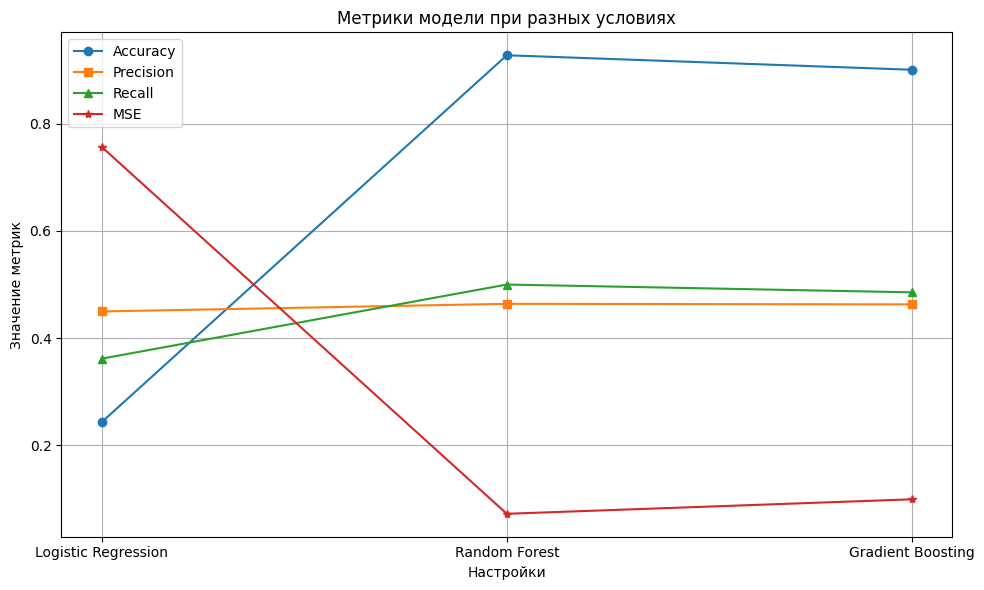

In [ ]:
import matplotlib.pyplot as plt

# Пример данных (замените своими)
settings = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.24324324324324326, 0.9279279279279279, 0.9009009009009009]
precision = [0.44973544973544977, 0.46396396396396394, 0.46296296296296297]
recall = [0.3616504854368932, 0.5, 0.4854368932038835]
mse = [0.7567567567567568, 0.07207207207207207, 0.0990990990990991]

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(settings, accuracy, label='Accuracy', marker='o')
plt.plot(settings, precision, label='Precision', marker='s')
plt.plot(settings, recall, label='Recall', marker='^')
plt.plot(settings, mse, label='MSE', marker='*')

# Настройка графика
plt.title('Метрики модели при разных условиях')
plt.xlabel('Настройки')
plt.ylabel('Значение метрик')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()


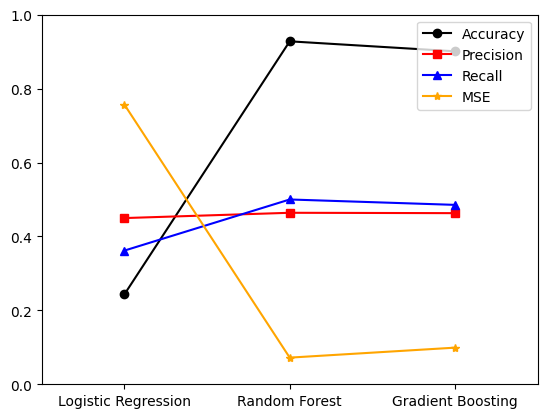

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
import numpy as np

# Данные
settings = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.2432, 0.9279, 0.9009]
precision = [0.4497, 0.4640, 0.4630]
recall = [0.3617, 0.5000, 0.4854]
mse = [0.7568, 0.0721, 0.0991]

# Фигуры
fig, ax = plt.subplots()
x = np.arange(len(settings))
lines = {  # Пустые линии для обновления
    "accuracy": ax.plot([], [], label="Accuracy", marker="o", color="black")[0],
    "precision": ax.plot([], [], label="Precision", marker="s", color="red")[0],
    "recall": ax.plot([], [], label="Recall", marker="^", color="blue")[0],
    "mse": ax.plot([], [], label="MSE", marker="*", color="orange")[0],
}

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(settings)
ax.legend()

# Анимация
def init():
    for line in lines.values():
        line.set_data([], [])
    return lines.values()

def update(frame):
    if frame < len(settings):
        x_data = x[:frame + 1]
        lines["accuracy"].set_data(x_data, accuracy[:frame + 1])
        lines["precision"].set_data(x_data, precision[:frame + 1])
        lines["recall"].set_data(x_data, recall[:frame + 1])
        lines["mse"].set_data(x_data, mse[:frame + 1])
    return lines.values()

# Количество кадров с задержкой на последнем кадре
pause_frames = 20  # количество задержки на последнем кадре

ani = FuncAnimation(
    fig, update, frames=len(settings) + pause_frames, init_func=init, blit=True
)

# Сохранение анимации как GIF
pillow_writer = PillowWriter(fps=2)
ani.save("animation.gif", writer=pillow_writer)

# Показ анимации
plt.show()


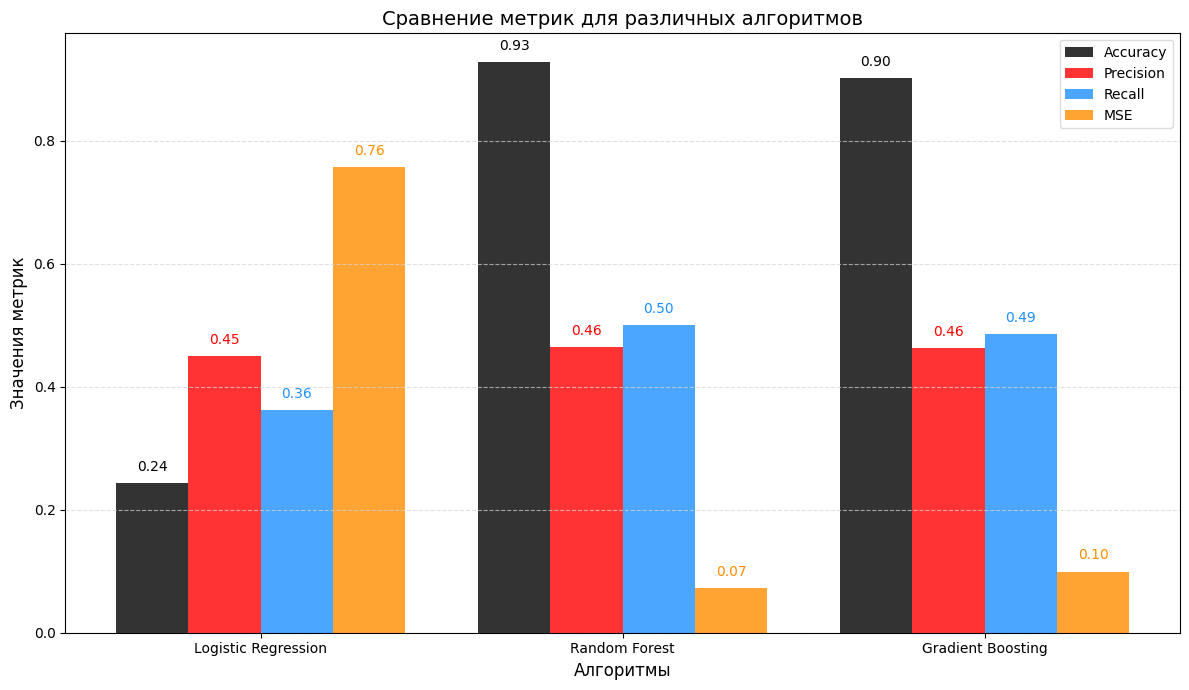

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
settings = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.2432, 0.9279, 0.9009]
precision = [0.4497, 0.4640, 0.4630]
recall = [0.3617, 0.5000, 0.4854]
mse = [0.7568, 0.0721, 0.0991]

# Цвета из дизайна
colors = {
    "accuracy": "#000000",  # Черный
    "precision": "#FF0000",  # Красный
    "recall": "#1E90FF",  # Голубой
    "mse": "#FF8C00",  # Оранжевый (добавлен для контраста)
    "background": "#FFFFFF",  # Белый фон
    "grid": "#D3D3D3",  # Светло-серый для сетки
}

# Настройка фона
plt.figure(figsize=(12, 7), facecolor=colors["background"])

# Позиции на оси X
x = np.arange(len(settings))

# Ширина столбцов
width = 0.2

# Построение столбчатой диаграммы
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color=colors["accuracy"], alpha=0.8)
plt.bar(x - 0.5 * width, precision, width, label='Precision', color=colors["precision"], alpha=0.8)
plt.bar(x + 0.5 * width, recall, width, label='Recall', color=colors["recall"], alpha=0.8)
plt.bar(x + 1.5 * width, mse, width, label='MSE', color=colors["mse"], alpha=0.8)

# Подписи значений
for i, value in enumerate(accuracy):
    plt.text(i - 1.5 * width, value + 0.02, f"{value:.2f}", ha='center', fontsize=10, color=colors["accuracy"])
for i, value in enumerate(precision):
    plt.text(i - 0.5 * width, value + 0.02, f"{value:.2f}", ha='center', fontsize=10, color=colors["precision"])
for i, value in enumerate(recall):
    plt.text(i + 0.5 * width, value + 0.02, f"{value:.2f}", ha='center', fontsize=10, color=colors["recall"])
for i, value in enumerate(mse):
    plt.text(i + 1.5 * width, value + 0.02, f"{value:.2f}", ha='center', fontsize=10, color=colors["mse"])

# Настройка графика
plt.title('Сравнение метрик для различных алгоритмов', fontsize=14, color=colors["accuracy"])
plt.xlabel('Алгоритмы', fontsize=12, color=colors["accuracy"])
plt.ylabel('Значения метрик', fontsize=12, color=colors["accuracy"])
plt.xticks(x, settings, color=colors["accuracy"])
plt.yticks(color=colors["accuracy"])
plt.legend(facecolor=colors["background"], edgecolor=colors["grid"], fontsize=10)
plt.grid(axis='y', linestyle='--', color=colors["grid"], alpha=0.7)

# Показать график
plt.tight_layout()
plt.show()


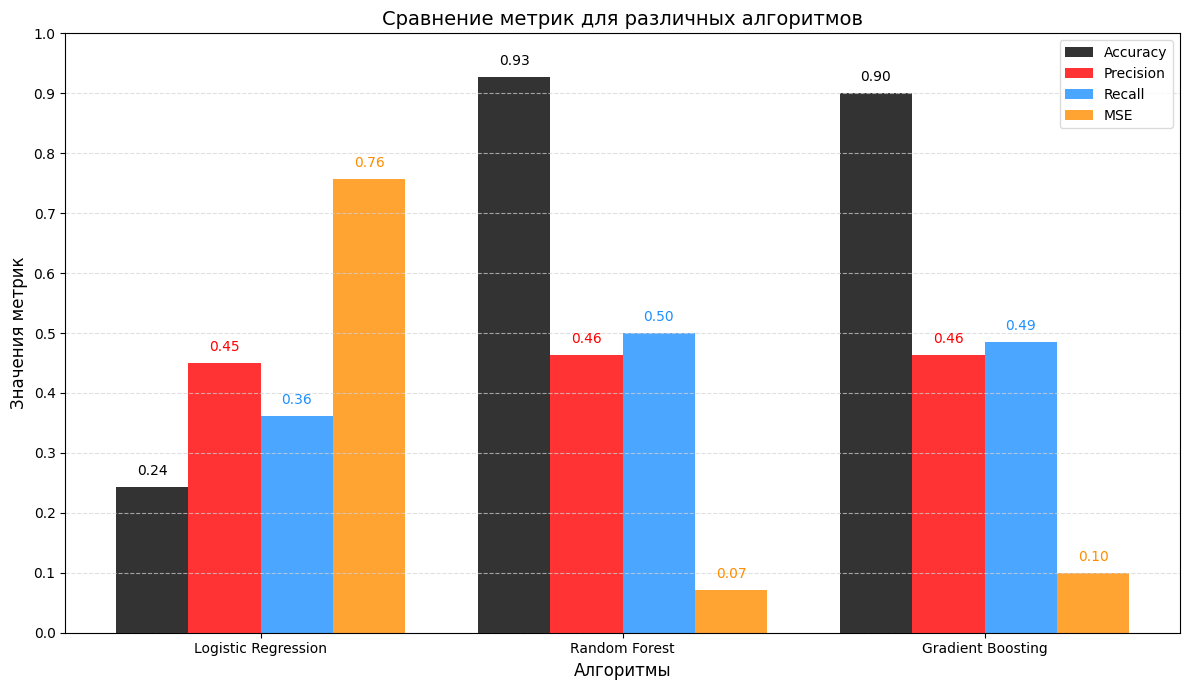

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Пример данных
settings = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.2432, 0.9279, 0.9009]
precision = [0.4497, 0.4640, 0.4630]
recall = [0.3617, 0.5000, 0.4854]
mse = [0.7568, 0.0721, 0.0991]

# Цвета из дизайна
colors = {
    "accuracy": "#000000",  # Черный
    "precision": "#FF0000",  # Красный
    "recall": "#1E90FF",  # Голубой
    "mse": "#FF8C00",  # Оранжевый
    "background": "#FFFFFF",  # Белый фон
    "grid": "#D3D3D3",  # Светло-серый для сетки
}

# Настройка фигуры
fig, ax = plt.subplots(figsize=(12, 7), facecolor=colors["background"])
x = np.arange(len(settings))
width = 0.2

# Пустые столбцы для анимации
bars_accuracy = ax.bar(x - 1.5 * width, [0] * len(settings), width, label='Accuracy', color=colors["accuracy"], alpha=0.8)
bars_precision = ax.bar(x - 0.5 * width, [0] * len(settings), width, label='Precision', color=colors["precision"], alpha=0.8)
bars_recall = ax.bar(x + 0.5 * width, [0] * len(settings), width, label='Recall', color=colors["recall"], alpha=0.8)
bars_mse = ax.bar(x + 1.5 * width, [0] * len(settings), width, label='MSE', color=colors["mse"], alpha=0.8)

# Настройка графика
ax.set_title('Сравнение метрик для различных алгоритмов', fontsize=14, color=colors["accuracy"])
ax.set_xlabel('Алгоритмы', fontsize=12, color=colors["accuracy"])
ax.set_ylabel('Значения метрик', fontsize=12, color=colors["accuracy"])
ax.set_xticks(x)
ax.set_xticklabels(settings, color=colors["accuracy"])
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_yticklabels([f"{i:.1f}" for i in np.linspace(0, 1, 11)], color=colors["accuracy"])
ax.legend(facecolor=colors["background"], edgecolor=colors["grid"], fontsize=10)
ax.grid(axis='y', linestyle='--', color=colors["grid"], alpha=0.7)
ax.set_ylim(0, 1)

# Анимация
def update(frame):
    if frame < len(settings):
        # Обновляем столбцы по метрикам
        bars_accuracy[frame].set_height(accuracy[frame])
        bars_precision[frame].set_height(precision[frame])
        bars_recall[frame].set_height(recall[frame])
        bars_mse[frame].set_height(mse[frame])
    elif frame == len(settings):
        # Добавляем текстовые метки на последнем кадре
        for i in range(len(settings)):
            ax.text(x[i] - 1.5 * width, accuracy[i] + 0.02, f"{accuracy[i]:.2f}", ha='center', fontsize=10, color=colors["accuracy"])
            ax.text(x[i] - 0.5 * width, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center', fontsize=10, color=colors["precision"])
            ax.text(x[i] + 0.5 * width, recall[i] + 0.02, f"{recall[i]:.2f}", ha='center', fontsize=10, color=colors["recall"])
            ax.text(x[i] + 1.5 * width, mse[i] + 0.02, f"{mse[i]:.2f}", ha='center', fontsize=10, color=colors["mse"])
    return bars_accuracy + bars_precision + bars_recall + bars_mse

# Количество кадров для задержки
pause_frames = 20  # задержка на последнем кадре

# Создание анимации
ani = FuncAnimation(
    fig, update, frames=len(settings) + pause_frames, blit=False, repeat=False
)

# Сохранение анимации (опционально)
from matplotlib.animation import PillowWriter
ani.save("bar_chart_animation.gif", writer=PillowWriter(fps=1))

# Показ анимации
plt.tight_layout()
plt.show()


# Кросс-валидация

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(pca_data)):
    print(f"Fold {i}:")
    print(f"  Training dataset index: {train_index}")
    print(f"  Test dataset index: {test_index}")

Fold 0:
  Training dataset index: [111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344
 345 346 347 348 

In [ ]:
kf.get_n_splits(pca_data)

5

In [ ]:
#y = [int(label) for label in y]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(PCA_model_gb, PCA_x_train, PCA_y_train, cv=kf)
scores

array([0.88764045, 0.92134831, 0.94382022, 0.89772727, 0.90909091])

In [ ]:
from numpy import mean
from numpy import std
# accuracy
print('Accuracy: %.3f ,\nStandard Deviations: %.3f' %
      (mean(scores), std(scores)))

Accuracy: 0.912 ,
Standard Deviations: 0.020


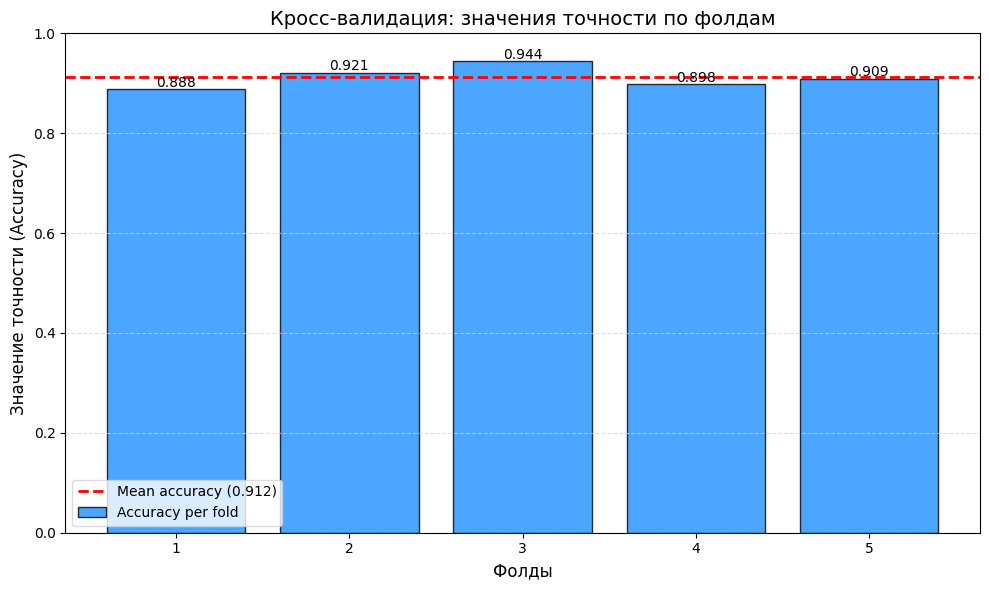

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных кросс-валидации (замените этими своими значениями)
scores = [0.88764045, 0.92134831, 0.94382022, 0.89772727, 0.90909091]
folds = range(1, len(scores) + 1)

# Среднее и стандартное отклонение
mean_score = np.mean(scores)
std_score = np.std(scores)

# Цвета из дизайна
colors = {
    "bars": "#1E90FF",  # Голубой
    "mean_line": "#FF0000",  # Красный
    "text": "#000000",  # Черный
    "background": "#FFFFFF",  # Белый
    "grid": "#D3D3D3",  # Светло-серый для сетки
}

# Построение графика
plt.figure(figsize=(10, 6), facecolor=colors["background"])
plt.bar(folds, scores, color=colors["bars"], alpha=0.8, label='Accuracy per fold', edgecolor='black')
plt.axhline(mean_score, color=colors["mean_line"], linestyle='--', linewidth=2, label=f'Mean accuracy ({mean_score:.3f})')

# Добавление значений точности над каждой колонкой
for i, score in enumerate(scores):
    plt.text(i + 1, score + 0.005, f"{score:.3f}", ha='center', fontsize=10, color=colors["text"])

# Настройка графика
plt.title('Кросс-валидация: значения точности по фолдам', fontsize=14, color=colors["text"])
plt.xlabel('Фолды', fontsize=12, color=colors["text"])
plt.ylabel('Значение точности (Accuracy)', fontsize=12, color=colors["text"])
plt.xticks(folds, color=colors["text"])
plt.ylim(0, 1)
plt.legend(facecolor=colors["background"], edgecolor=colors["grid"], fontsize=10)
plt.grid(axis='y', linestyle='--', color=colors["grid"], alpha=0.7)

# Показ графика
plt.tight_layout()
plt.show()

c:\Users\fuelc\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:872: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



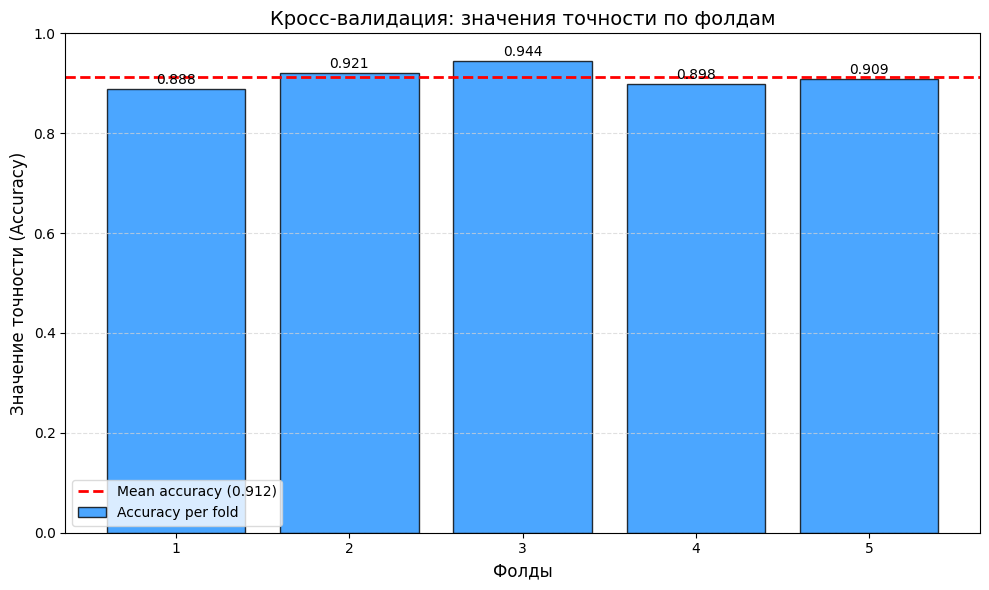

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Пример данных кросс-валидации
scores = [0.88764045, 0.92134831, 0.94382022, 0.89772727, 0.90909091]
folds = range(1, len(scores) + 1)

# Среднее и стандартное отклонение
mean_score = np.mean(scores)

# Цвета из дизайна
colors = {
    "bars": "#1E90FF",  # Голубой
    "mean_line": "#FF0000",  # Красный
    "text": "#000000",  # Черный
    "background": "#FFFFFF",  # Белый
    "grid": "#D3D3D3",  # Светло-серый для сетки
}

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6), facecolor=colors["background"])
bars = ax.bar(folds, [0] * len(scores), color=colors["bars"], alpha=0.8, edgecolor='black', label='Accuracy per fold')
mean_line = ax.axhline(mean_score, color=colors["mean_line"], linestyle='--', linewidth=2, label=f'Mean accuracy ({mean_score:.3f})')

# Настройка графика
ax.set_title('Кросс-валидация: значения точности по фолдам', fontsize=14, color=colors["text"])
ax.set_xlabel('Фолды', fontsize=12, color=colors["text"])
ax.set_ylabel('Значение точности (Accuracy)', fontsize=12, color=colors["text"])
ax.set_xticks(folds)
ax.set_ylim(0, 1)
ax.legend(facecolor=colors["background"], edgecolor=colors["grid"], fontsize=10)
ax.grid(axis='y', linestyle='--', color=colors["grid"], alpha=0.7)

# Анимация
def update(frame):
    if frame < len(scores):
        # Обновляем высоту баров до текущего кадра
        for i in range(frame + 1):
            bars[i].set_height(scores[i])
    elif frame == len(scores):
        # Добавление текстовых меток на последнем кадре
        for i, score in enumerate(scores):
            ax.text(
                folds[i], scores[i] + 0.01, f"{scores[i]:.3f}",
                ha='center', fontsize=10, color=colors["text"]
            )
    return bars

# Количество кадров для задержки
pause_frames = 20  # Количество кадров для задержки на последнем графике

# Анимация
ani = FuncAnimation(
    fig, update, frames=len(scores) + pause_frames, blit=False, repeat=False
)

# Сохранение анимации как GIF (опционально)
from matplotlib.animation import PillowWriter
ani.save("cross_validation_animation.gif", writer=PillowWriter(fps=2))

# Показ анимации
plt.tight_layout()
plt.show()


Среднее значение кросс-валидации для данной модели составляет примерно **0.912**. Это говорит о том, что модель достаточно хорошо обобщается на новых данных и обладает неплохой предсказательной способностью. Значения кросс-валидации близки друг к другу, что также свидетельствует о стабильности модели. В целом, результаты кросс-валидации указывают на то, что **данная модель может быть эффективной в задачах прогнозирования**.